# Experiment 1 Analysis

Visualizations and descriptive statistics for Experiment 1.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
hp = sns.cubehelix_palette(n_colors=4, rot=.5)
plot_palette = [hp[3], hp[1]]

In [3]:
import matplotlib

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Learner Concept Knowledge

In [4]:
teacher_joined_survey = pd.read_csv("data/exp1_anonymized.csv")
teacher_joined_survey = teacher_joined_survey.rename({"visibility": "Context"}, axis=1)

final_level = teacher_joined_survey[teacher_joined_survey.level_number == 10]


/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60598/2422353022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot.sort_values(["comm_viz"], inplace=True)
/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60598/2422353022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot["size"] = 3000


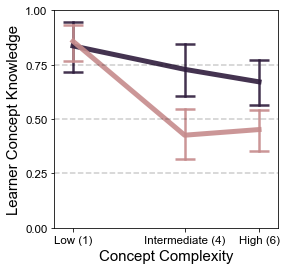

In [5]:
to_plot = final_level
to_plot.sort_values(["comm_viz"], inplace=True)

plt.figure(figsize=(4, 4))
to_plot["size"] = 3000

ax = sns.lineplot(x="boolean_complexity", y="learner_concept", hue='communication', data=to_plot, 
                  err_style="bars", err_kws={"capsize": 10, "capthick": 2.5, "linewidth": 2.5}, ci=95, 
                  linewidth=5, alpha=.9, palette=plot_palette)

plt.ylabel("Learner Concept Knowledge")
plt.xlabel("Concept Complexity")

for x in [.25, .5, .75]:
    ax.axhline(x, alpha=.2, linestyle='--', c='k')
    
plt.yticks([0, .25, .5, .75, 1])
plt.ylim(0, 1)

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=11.5)

plt.xticks([1, 4, 6], labels=["Low (1)", "Intermediate (4)", "High (6)"])
plt.xlim(.5, 6.5)

plt.legend(prop={'size': 15, 'weight': 'bold'})
plt.gca().legend().remove()

In [6]:
final_level.groupby(["communication", "boolean_complexity"]).learner_concept.describe()

count      mean       std  min    25%  \
communication boolean_complexity                                          
chat          1                    29.0  0.836207  0.315350  0.0  1.000   
              4                    35.0  0.728571  0.359337  0.0  0.375   
              6                    38.0  0.671053  0.326764  0.0  0.500   
demo          1                    36.0  0.857639  0.253815  0.0  0.750   
              4                    37.0  0.425676  0.367352  0.0  0.000   
              6                    31.0  0.451613  0.271334  0.0  0.375   

                                    50%      75%  max  
communication boolean_complexity                       
chat          1                   1.000  1.00000  1.0  
              4                   1.000  1.00000  1.0  
              6                   0.750  0.96875  1.0  
demo          1                   1.000  1.00000  1.0  
              4                   0.375  0.62500  1.0  
              6                   0.500  0.62500  1.0

# Concept Simplification

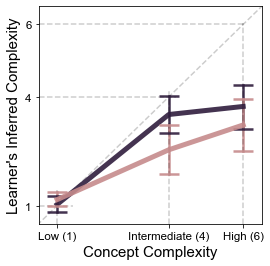

In [7]:
plt.figure(figsize=(4, 4))
plt.plot(range(0, 12), range(0, 12), linestyle='--', c='k', alpha=.2)

plt.xlim(.5, 6.5)
plt.ylim(.5, 6.5)
plt.yticks((1, 4, 6))

for complexity in [1, 4, 6]:
    plt.axvline(complexity, ymax=complexity/6.5, linestyle='--', c='k', alpha=.2)
    plt.axhline(complexity, xmax=complexity/6.5, linestyle='--', c='k', alpha=.2)

ax = sns.lineplot(x="boolean_complexity", y="learner_inferred_complexity", hue='communication', data=final_level, 
                  err_style="bars", err_kws={"capsize": 10, "capthick": 2.5, "linewidth": 2.5}, ci=95, 
                  linewidth=5, alpha=.9, palette=plot_palette)

plt.xlabel("Concept Complexity")
plt.ylabel("Learner's Inferred Complexity")
plt.xticks([1, 4, 6], labels=["Low (1)", "Intermediate (4)", "High (6)"])

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=11.5)

plt.gca().legend().remove()

In [8]:
final_level.groupby(["communication", "boolean_complexity"]).learner_inferred_complexity.describe()

count      mean       std  min  25%  50%  \
communication boolean_complexity                                             
chat          1                    29.0  1.034483  0.625800  0.0  1.0  1.0   
              4                    35.0  3.514286  1.597267  0.0  3.0  4.0   
              6                    38.0  3.736842  2.088375  0.0  3.0  3.0   
demo          1                    36.0  1.166667  0.609449  0.0  1.0  1.0   
              4                    37.0  2.540541  2.049317  0.0  0.0  3.0   
              6                    31.0  3.225806  2.108865  0.0  2.0  3.0   

                                  75%  max  
communication boolean_complexity            
chat          1                   1.0  3.0  
              4                   4.0  8.0  
              6                   6.0  6.0  
demo          1                   1.0  3.0  
              4                   4.0  6.0  
              6                   5.0  8.0

# Player Scores

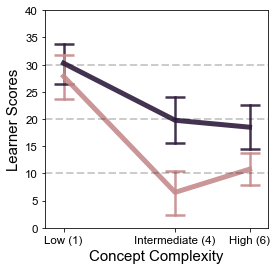

In [9]:
plt.figure(figsize=(4,4))

final_level = to_plot

ax = sns.lineplot(data=final_level.sort_values(['Context', "communication", "boolean_complexity"], ascending=True), x="boolean_complexity", y='cum_player_score', 
                  hue='communication', style="Context", alpha=.9,
                  err_style="bars", err_kws={"capsize": 10, "capthick": 2.5, "linewidth": 2.5}, ci=95, 
                  linewidth=5, palette=plot_palette)

for score in [10, 20, 30]:
    plt.axhline(score, linestyle="--", c='k', alpha=.2, linewidth=2)

plt.ylabel("Learner Scores")
plt.xlabel("Concept Complexity")

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=11.5)

plt.ylim(0, 40)
plt.xlim(0.5, 6.5)

plt.xticks([1, 4, 6], labels=["Low (1)", "Intermediate (4)", "High (6)"])
plt.xlim(.5, 6.5)

plt.gca().legend().remove()
plt.show()


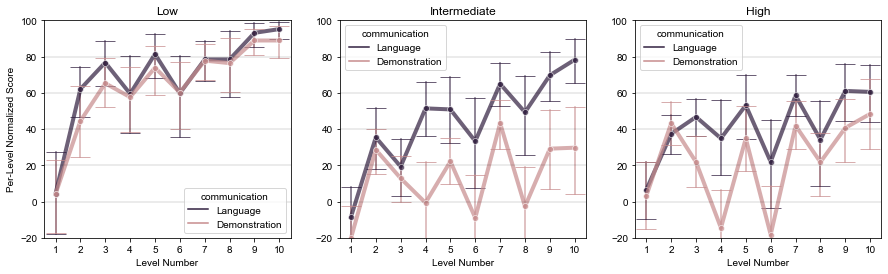

In [10]:
sorted_full = teacher_joined_survey.sort_values(["communication", "level_number"], ascending=True)
concepts_to_plot = sorted(sorted_full.concept_number.unique())
fig, axs = plt.subplots(nrows=1, ncols=len(concepts_to_plot), figsize=(5*len(concepts_to_plot), 4))

plot_titles = ["Low", "Intermediate", "High"]

sorted_full["communication"] = sorted_full.communication.apply(lambda x: "Language" if x == "chat" else "Demonstration")

for ax, concept in zip(axs.reshape(-1), concepts_to_plot): 
    to_plot = sorted_full[sorted_full.concept_number == concept]
    
    sns.lineplot(data=to_plot, x='level_number', y="pct_max_score", hue='communication', 
                 sort=False, marker='o',
                 err_style="bars", err_kws={"capsize": 10}, palette=plot_palette,
                 ci=95, linewidth=4, alpha=.7, ax=ax)

    ax.set_title("{}".format(plot_titles[concept-1]))
    ax.set_ylabel("")
    ax.set_xlabel("Level Number")
        
    for x in [0, 20, 40, 60, 80]:
        ax.axhline(x, alpha=.1, c='k')
    ax.set_ylim(-20, 100)
    ax.set_xticks(range(1,11))
    
    axs.reshape(-1)[0].set_ylabel("Per-Level Normalized Score")

In [11]:
final_level.groupby(["boolean_complexity", "communication"]).cum_player_score.describe()

count       mean        std   min   25%  \
boolean_complexity communication                                            
1                  chat            29.0  30.275862  10.467284   6.0  26.0   
                   demo            36.0  27.861111  12.386981   0.0  19.5   
4                  chat            35.0  19.771429  13.445064  -5.0   8.0   
                   demo            37.0   6.513514  13.029074 -20.0  -3.0   
6                  chat            38.0  18.500000  12.967214 -18.0   8.5   
                   demo            31.0  10.774194   8.589566  -8.0   4.5   

                                   50%    75%   max  
boolean_complexity communication                     
1                  chat           34.0  38.00  43.0  
                   demo           32.0  38.00  43.0  
4                  chat           22.0  32.00  38.0  
                   demo            5.0  16.00  35.0  
6                  chat           19.5  29.75  39.0  
                   demo           12.0  17.50  28.0